
# Final Report

groupe :


    - Paul Le Bolloch
    - Ilann Amiaud--Plachy
    - Gaétan Jacquemin


## Introduction

https://snap.stanford.edu/data/ego-Facebook.html


to download the data, you can use the following command:

```bash
mkdir -p data
wget https://snap.stanford.edu/data/facebook.tar.gz
wget https://snap.stanford.edu/data/facebook_combined.txt.gz
mv PP-Pathways_ppi.csv.gz data/
```

# Exploration générale

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Graphe des "ego" 

Un "ego" est considéré comme une personne au centre d'un réseau social. On a ici les informations sur 10 ego. Leurs ID respectifs sont stockés ci-dessous.

In [2]:
ego_ids = [0, 107, 348, 414, 686, 698, 1684, 1912, 3437, 3980]

In [4]:
# Dossier contenant les fichiers extraits
base_path = "../data/facebook/"

# Id de l'ego à explorer (par ex. 0)
ego_id = str(ego_ids[0])

# Message de print
print(f"Exploration des données de l'ego {ego_id}\n-----------------------------------\n")

# Chemins des fichiers
edges_path = os.path.join(base_path, f"{ego_id}.edges")
feat_path = os.path.join(base_path, f"{ego_id}.feat")
featnames_path = os.path.join(base_path, f"{ego_id}.featnames")
egofeat_path = os.path.join(base_path, f"{ego_id}.egofeat")
circles_path = os.path.join(base_path, f"{ego_id}.circles")

# Lire les arêtes (relations d’amitié dans l’ego-network)
with open(edges_path, 'r') as f:
    edges = [line.strip().split() for line in f]
print(f"Nombre d'arêtes : {len(edges)}")
print("Exemples d'arêtes :", edges[:5])

# Lire les features des amis
features = np.loadtxt(feat_path)
# Titres des colonnes
print(f"\nFeatures (shape): {features.shape}")
print("Première ligne de features :", features[0])
print("Features are '1' if the user has this property in their profile, and '0' otherwise.")

# Lire les noms des features
with open(featnames_path, 'r') as f:
    feat_names = [line.strip() for line in f]
print(f"\nNombre de features : {len(feat_names)}")
print("Exemples :", feat_names[:5])

# Lire les features du noeud ego lui-même
ego_features = np.loadtxt(egofeat_path)
print(f"\nFeatures de l'ego : {ego_features[:10]}...")

# Lire les cercles (Un cercle est un ensemble d’amis regroupés par l’utilisateur selon un critère personnel.)
with open(circles_path, 'r') as f:
    circles = [line.strip().split() for line in f]
print(f"\nNombre de cercles définis par l'ego : {len(circles)}")
print("Exemple de cercle :", circles[0])

Exploration des données de l'ego 0
-----------------------------------

Nombre d'arêtes : 5038
Exemples d'arêtes : [['236', '186'], ['122', '285'], ['24', '346'], ['271', '304'], ['176', '9']]

Features (shape): (347, 225)
Première ligne de features : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Features are '1' if the user has this property in their profil

## Graphe combiné pour l'analyse

### Exploration du graphe

In [6]:
# Charger le graphe depuis un fichier d'arêtes (espace comme séparateur)
G = nx.read_edgelist("../data/facebook_combined.txt", create_using=nx.Graph(), nodetype=int)

# Afficher des infos de base
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d’arêtes : {G.number_of_edges()}")
print(f"Est-ce connexe ? : {nx.is_connected(G)}")
print(f"Nombre de composantes connexes : {nx.number_connected_components(G)}")
print(f"Graphe dirigé ? : {nx.is_directed(G)}")

# Exemple : nombre de voisins du noeud 0
print("Voisins du noeud 0 :", list(G.neighbors(0))[:10], "...")

Nombre de nœuds : 4039
Nombre d’arêtes : 88234
Est-ce connexe ? : True
Nombre de composantes connexes : 1
Graphe dirigé ? : False
Voisins du noeud 0 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ...


In [7]:
print(f"Diamètre du graphe : {nx.diameter(G)}")
print(f"Rayon du graphe : {nx.radius(G)}")
print(f"Centre du graphe : {nx.center(G)}")
print(f"Nombre de triangles : {sum(nx.triangles(G).values()) // 3}")

Diamètre du graphe : 8
Rayon du graphe : 4
Centre du graphe : [567]
Nombre de triangles : 1612010


- nx.diameter(G): plus grande distance possible entre deux noeuds du graphe. C'est le maximum de l'excentricité pour tous les noeuds.

    - La théorie des six degrés de séparation affirme que toute personne dans le monde peut être reliée à n’importe quelle autre à travers au plus 6 relations sociales (diamètre <=6). On peut s'attendre à tendre vers cette valeur si on ajoute d'autres personnes dans ce graphe.
- nx.radius(G): c'est le minimum de l'excentricité
- nx.center renvoie l’ensemble des nœuds qui ont la distance maximale minimale vers tous les autres (valeur du rayon) En d’autres termes, ce sont les nœuds les plus “proches” de tous les autres, dans le pire des cas. Le noeud 567 est donc celui qui est le plus proche de toutes les autres personnes.
- triangles: permettent de détecter des communautés locales (ici des amis en commun). On voit ici un très grand nombre de triangles, ce qui est logique pour un réseau social.

80% des nœuds ont un degré <= 69
Degré minimum : 1
Degré maximum : 1045
Degré moyen : 43.69


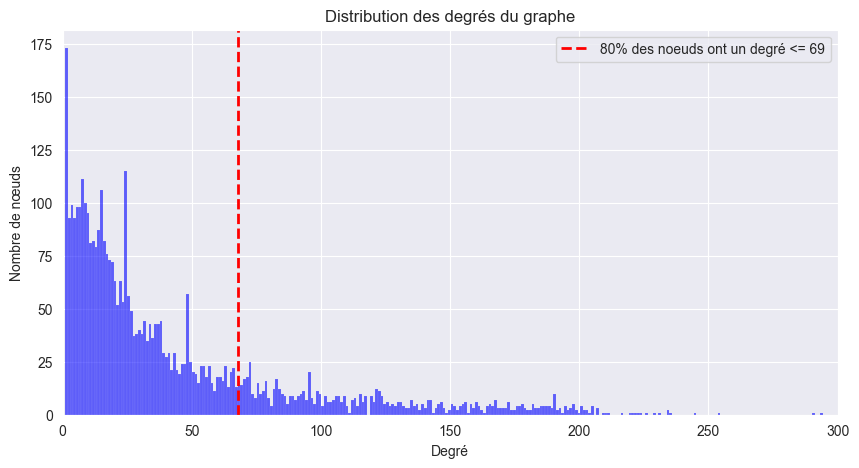

In [8]:
# Calculer les degrés de chaque nœud
degrees = [deg for _, deg in G.degree()]

# Calcul de 80% des valeurs
degrees = np.array(degrees)
degrees_sorted = np.sort(degrees)
unique_degree, count_degree = np.unique(degrees_sorted, return_counts=True)
cumulative_percentage = np.cumsum(count_degree) / len(degrees)
idx_80 = np.argmax(cumulative_percentage >= 0.8)
print(f"80% des nœuds ont un degré <= {unique_degree[idx_80]}")

# Afficher quelques statistiques
print(f"Degré minimum : {min(degrees)}")
print(f"Degré maximum : {max(degrees)}")
print(f"Degré moyen : {np.mean(degrees):.2f}")

# Version seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(degrees, bins=1000, color='blue', log_scale=False, alpha=0.6)
plt.axvline(x=idx_80, color='red', linestyle='--', linewidth=2, label = f"80% des noeuds ont un degré <= {unique_degree[idx_80]}")
plt.xlim(0, 300)
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.title("Distribution des degrés du graphe")
plt.legend()
plt.show()

- Distribution à queue longue (loi de puissance): 80% des noeuds ont un degré compris entre 1 et 69
- Quelques rares "super-connecteurs" -> personnes très influentes (attention aux ego listés au début du Notebook qui sont naturellement sur-représentés car les graphes sont construits à partir de leur réseau)

### Visualisation du graphe

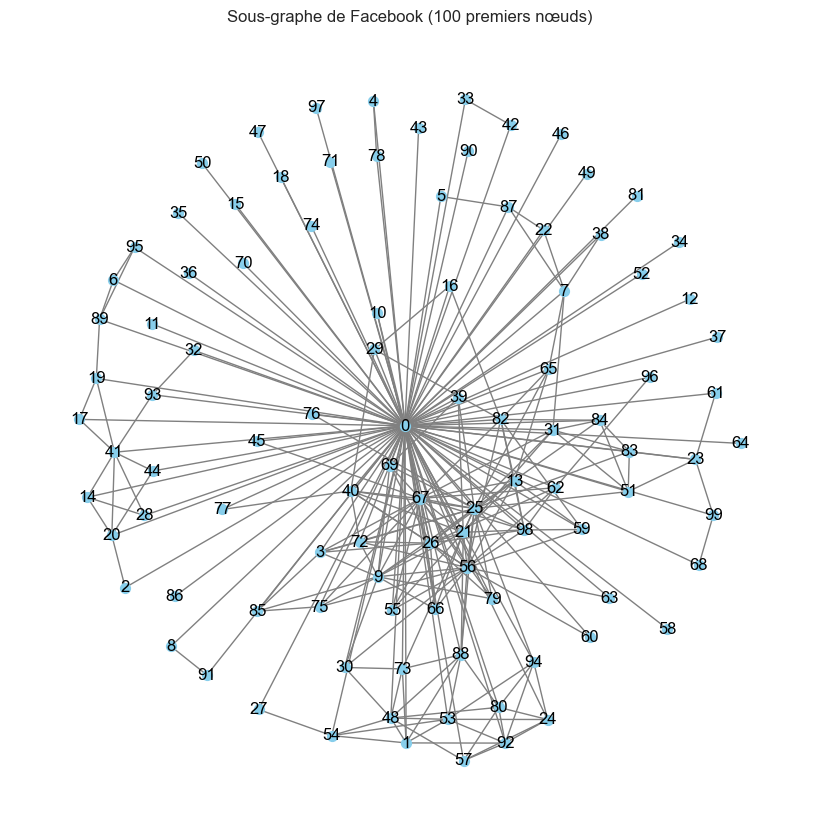

In [9]:
# Extraire un sous-graphe (par exemple les 100 premiers nœuds)
nodes_sample = list(G.nodes)[:100]
H = G.subgraph(nodes_sample)

# Visualiser ce sous-graphe
plt.figure(figsize=(8, 8))
nx.draw(H, with_labels=True, node_size=50, node_color='skyblue', edge_color='gray')
plt.title("Sous-graphe de Facebook (100 premiers nœuds)")
plt.show()

# Analyses de centralité

## Degree centrality
- Mesure la fraction des noeuds connectés au noeud concerné

In [10]:
degree_centrality = nx.degree_centrality(G)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par centralité en degré :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par centralité en degré :
Nœud 107 -> Centralité : 0.2588
Nœud 1684 -> Centralité : 0.1961
Nœud 1912 -> Centralité : 0.1870
Nœud 3437 -> Centralité : 0.1355
Nœud 0 -> Centralité : 0.0859


- Comme attendu on retrouve des noeuds de la liste des egos (le dataset a été construit à partir de leurs relations)

In [11]:
# Vérification
top_centrality = len(list(G.neighbors(107))) / (G.number_of_nodes() - 1) 
top_centrality

0.25879148093115406

In [12]:
# Enlever les noeuds ego
G_no_ego = G.copy()
G_no_ego.remove_nodes_from(list(ego_ids))

In [13]:
degree_centrality_no_ego = nx.degree_centrality(G_no_ego)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(degree_centrality_no_ego.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par centralité en degré (excepté noeuds ego):")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par centralité en degré (excepté noeuds ego):
Nœud 2543 -> Centralité : 0.0727
Nœud 2347 -> Centralité : 0.0720
Nœud 1888 -> Centralité : 0.0628
Nœud 1800 -> Centralité : 0.0606
Nœud 1663 -> Centralité : 0.0581


- Le noeud 2543 est intéressant car il concentre 7% des connexions possibles alors que tout son réseau n'est pas représenté 

Par ailleurs on peut supposer une forte connecitivité du réseau car la centralité des 5 noeuds les plus centraux concentrent chacun plus de 5% des connexions possibles

## Betweenness centrality

- Mesure l’importance d’un nœud pour la circulation de l’information (il est sur beaucoup de chemins courts).
- Ces nœuds jouent un rôle de ponts entre différentes parties du graphe.

In [14]:
betweenness_centrality = nx.betweenness_centrality(G)

# Afficher les 5 nœuds les plus centraux
top_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nœuds par intermédiarité :")
for node, centrality in top_nodes:
    print(f"Nœud {node} -> Centralité : {centrality:.4f}")

Top 5 nœuds par intermédiarité :
Nœud 107 -> Centralité : 0.4805
Nœud 1684 -> Centralité : 0.3378
Nœud 3437 -> Centralité : 0.2361
Nœud 1912 -> Centralité : 0.2293
Nœud 1085 -> Centralité : 0.1490


- On retrouve des noeuds de la liste ego. Cependant le classement diffère. Le noeud 107 est non seulement le noeud avec le plus de connexions directes (le plus grand nombres d'amis) mais semble aussi être une relation intéressante dans le cadre de networking: si l'on veut contacter quelqu'un de ce graphe, il y a des bonnes chances que 107 soit la personne qui nous mette en contact le plus directement (plus cours chemin).

- L'utilisateur 0 est un utilisateur avec un grand nombre d'amis (top 5 classement degree centrality) mais n'est vraisemblablement pas au coeur du réseau (il possèdes un réseau d'amis potentiellement moins connecté et donc moins intéressant dans le cadre du networking)

# Community detection

## Méthode de Louvain (optimisation de la modularité)

- Algorithme basé sur l’optimisation de la modularité, une mesure de la densité des arêtes dans les communautés par rapport à un graphe aléatoire.

In [15]:
import community as community_louvain

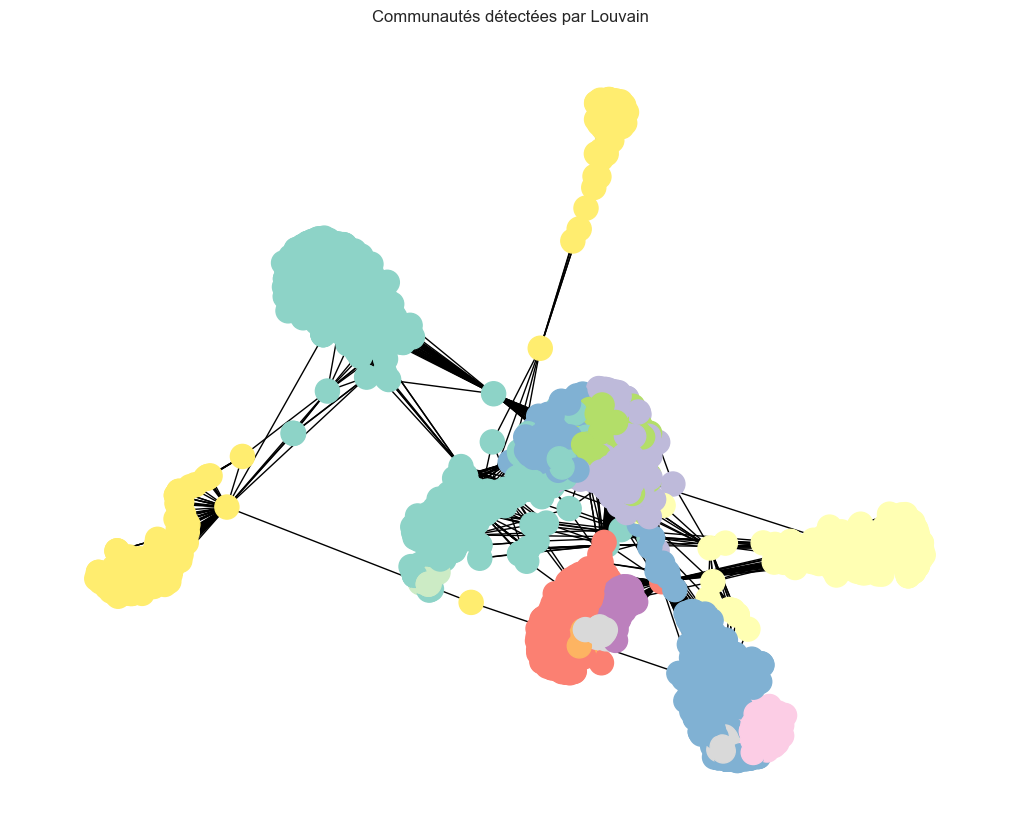

In [16]:
# Chaque noeud est affecté à une communauté (int)
# Exemple : {0: 1, 1: 0, 2: 1, 3: 2, ...}
plt.figure(figsize=(10, 8))
partition = community_louvain.best_partition(G)

# Visualisation
pos = nx.spring_layout(G, seed=0) # Position des noeuds
cmap = plt.cm.Set3 # Couleurs
nx.draw(G, pos, node_color=list(partition.values()), with_labels=False, cmap=cmap)
plt.title("Communautés détectées par Louvain")
plt.show()

- Améliorons la visibilité du graphique:

    - Taille des noeuds variable en fonction du degré
    - Affichage des labeles des noeuds principaux
    - Ajout de transparence des arrêtes

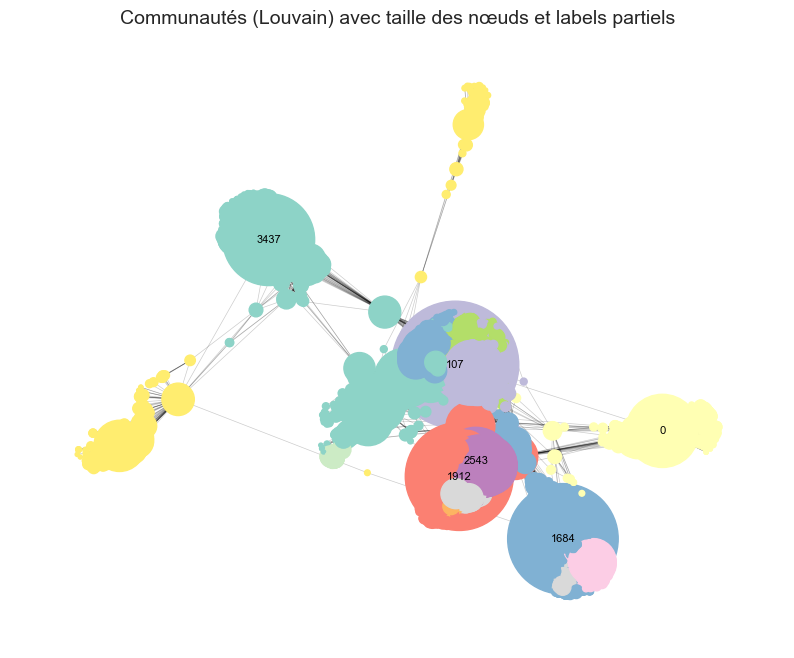

In [17]:
plt.figure(figsize=(10, 8))
node_sizes = [1 + 8 * G.degree(n) for n in G.nodes()]
labels = {n: str(n) for n in G.nodes() if G.degree(n) > 300}
# Ajout de 243 discuté précédemment
labels[2543] = '2543'
cmap = plt.cm.Set3

nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(G, pos,
                       node_color=list(partition.values()),
                       node_size=node_sizes,
                       cmap=cmap)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Communautés (Louvain) avec taille des nœuds et labels partiels", fontsize=14)
plt.axis('off')
plt.show()

In [18]:
# Nombre de communautés
nb_louvain_community = len(set(partition.values()))
print(f"Nombre de communautés détectées par Louvain : {nb_louvain_community}")

Nombre de communautés détectées par Louvain : 16


- On obtient 16 communautés
- On retrouve le fait que 107 occupe une place centrale dans ce réseau, ou encore que 0 est intéressant du point de vue de ses connexions directes mais moins par sa capacité à mettre en relation des utilisateurs.
- On a également affiché 2543 qui est le noeud avec le plus grand nombre d'amis (hors noeuds ego)

## Label Propagation Algorithm (LPA)

- Chaque nœud adopte le label le plus fréquent parmi ses voisins. Processus itératif jusqu’à convergence (méthode très rapide et sans paramètre)

In [19]:
from networkx.algorithms.community import label_propagation_communities

communities = list(label_propagation_communities(G))

In [20]:
communities
partition_lpa = {}
for index, community in enumerate(communities):
    for node in community:
        partition_lpa[node] = index

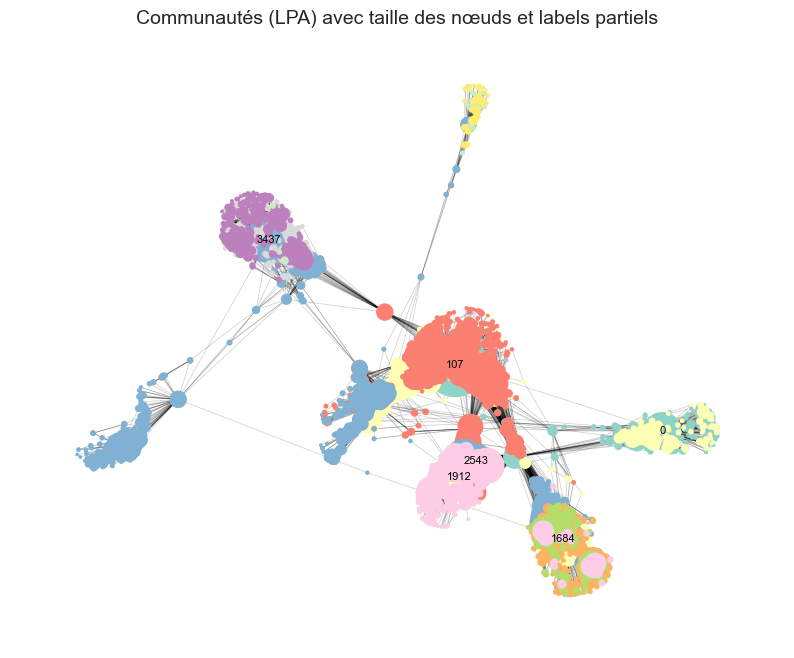

In [21]:
plt.figure(figsize=(10, 8))
node_sizes = [1 + 2 * G.degree(n) for n in G.nodes()]
labels = {n: str(n) for n in G.nodes() if G.degree(n) > 300}
# Ajout de 243 discuté précédemment
labels[2543] = '2543'
cmap = plt.cm.Set3

nx.draw_networkx_edges(G, pos, alpha=0.2, width=0.5)
nx.draw_networkx_nodes(G, pos,
                       node_color=list(partition_lpa.values()),
                       node_size=node_sizes,
                       cmap=cmap)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

plt.title("Communautés (LPA) avec taille des nœuds et labels partiels", fontsize=14)
plt.axis('off')
plt.show()

- La méthode LPA a tourné beaucoup plus rapidement mais on constate des communautés moins distinctes visuellement

- C'est l'occasion de nous pencher sur la méthode de visualisation spring layout (aussi appelé Fruchterman-Reingold) qui positionne les nœuds selon une simulation physique :

	- Les arêtes se comportent comme des ressorts entre les nœuds → elles veulent réduire leur longueur.
	- Les nœuds se repoussent les uns les autres pour éviter le chevauchement.
	- Cette méthode ne dit rien sur les communautés mais positionne les noeuds uniquement selon leur "force locale"

# Embedding (shallow) for clustering

## Méthodes spectrales

- Technique de réduction de dimensionnalité non supervisée, basée sur la décomposition spectrale du Laplacien du graphe.
- Similaire à PCA (analyse en composantes principales), mais adapté aux graphes ou données non-linéaires.

In [22]:
from sklearn.cluster import KMeans
from sklearn.manifold import SpectralEmbedding

# Créer une représentation spectrale du graphe
embedding = SpectralEmbedding(n_components=2, affinity='precomputed')
adj_matrix = nx.to_numpy_array(G)
X = embedding.fit_transform(adj_matrix)

# Clustering avec k-means
kmeans = KMeans(n_clusters=4).fit(X)
labels = kmeans.labels_

In [23]:
print(f"On retrouve avec X.shape le nombre de noeuds: {X.shape[0]} et le nombre de composants principaux: {X.shape[1]}")

On retrouve avec X.shape le nombre de noeuds: 4039 et le nombre de composants principaux: 2


In [24]:
# Score de silhouette
from sklearn.metrics import silhouette_score

silhouette_score(X, labels)

0.8487853746061423

- On a choisi arbitrairement 4 clusters
- Le score de silhouette est proche de 1, ce qui est un bon score

## node2vec

- node2vec est une technique d’embedding de graphe, qui transforme chaque nœud en un vecteur dense de dimension fixe
- Inspirée de word2vec, elle repose sur :

    - Des random walks biaisés (exploration du graphe autour des nœuds)
    - Un apprentissage par Skip-gram (comme en NLP) pour apprendre des représentations de voisinage.

In [25]:
from node2vec import Node2Vec

# Génère des random walks et apprend les embeddings
node2vec = Node2Vec(G, dimensions=30, walk_length=30, num_walks=20, workers=2) # dim = 30 faible pour l'exemple (64 par défaut), num_walks = 20 (200 par défaut)
model = node2vec.fit(window=10, min_count=1)

# Récupère le vecteur d’un noeud
embedding = model.wv['42']  # 64-dim vector

# Utilisable pour clustering, classification, visualisation...

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

Generating walks (CPU: 2): 100%|██████████| 10/10 [00:06<00:00,  1.63it/s]


In [26]:
X = model.wv.vectors

In [27]:
print(f"On retrouve avec X.shape le nombre de noeuds: {X.shape[0]} et la dimension de l'embedding: {X.shape[1]}")

On retrouve avec X.shape le nombre de noeuds: 4039 et la dimension de l'embedding: 30


In [28]:
# Clustering avec k-means
kmeans = KMeans(n_clusters=4).fit(X)
labels_node2vec = kmeans.labels_

In [29]:
# Score de silhouette
from sklearn.metrics import silhouette_score

silhouette_score(X, labels_node2vec)

0.24119867

- La première méthode a un bien meilleur silhouette score
- En effet node2vec est ici peu fiable car: 

    - node2vec projette sur des vecteurs à seulement 30 dimensions. On pourrait également augmenter num_walk mais ceci ralonge considérablement la phase d'embedding

# Facebook Feature Dataset

## Loader le dataset

In [1]:
import json
import pandas as pd

PATH = "../data/facebook_large/"

# Charger le JSON
with open(PATH + "musae_facebook_features.json", "r") as f:
    node_features = json.load(f)

# Construction des tuples (node, feature)
rows = []
for node, features in node_features.items():
    for feat in features:
        rows.append((int(node), feat))

# Création du DataFrame binaire
df = pd.DataFrame(rows, columns=["id", "feature"])
feature_df = pd.crosstab(df["id"], df["feature"]).astype(int)

target_df = pd.read_csv(PATH + "musae_facebook_target.csv")

# Vérifier les colonnes du fichier cible
print(target_df.head())

# Ajouter la colonne target au DataFrame binaire
df_merged = feature_df.merge(target_df, left_index=True, right_on="id")

# Résultat
print(df_merged.head())


   id       facebook_id                                     page_name  \
0   0   145647315578475                      The Voice of China 中国好声音   
1   1      191483281412                 U.S. Consulate General Mumbai   
2   2   144761358898518                                          ESET   
3   3   568700043198473  Consulate General of Switzerland in Montreal   
4   4  1408935539376139             Mark Bailey MP - Labor for Miller   

    page_type  
0      tvshow  
1  government  
2     company  
3  government  
4  politician  
   0  1  2  3  4  5  6  7  8  9  ...  4708  4709  4710  4711  4712  4713  id  \
0  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   0   
1  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   1   
2  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     1   2   
3  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   3   
4  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     

In [2]:
edges_df = pd.read_csv(PATH + "musae_facebook_edges.csv", sep=",")  # ou sep="," si ce n’est pas du TSV
edges_df.head()

,id_1,id_2
0,0,18427
1,1,21708
2,1,22208
3,1,22171
4,1,6829


In [3]:
# Créer un graphe non orienté
G = nx.from_pandas_edgelist(edges_df, source="id_1", target="id_2")

# Afficher des infos de base
print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d’arêtes : {G.number_of_edges()}")
print(f"Est-ce connexe ? : {nx.is_connected(G)}")
print(f"Nombre de composantes connexes : {nx.number_connected_components(G)}")
print(f"Graphe dirigé ? : {nx.is_directed(G)}")

# Exemple : nombre de voisins du noeud 0
print("Voisins du noeud 0 :", list(G.neighbors(1))[:10], "...")

NameError: name 'nx' is not defined

In [ ]:
target_df.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [ ]:
feature_df.head()

feature,0,1,2,3,4,5,6,7,8,9,...,4704,4705,4706,4707,4708,4709,4710,4711,4712,4713
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_merged.head()

,0,1,2,3,4,5,6,7,8,9,...,4708,4709,4710,4711,4712,4713,id,facebook_id,page_name,page_type
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,191483281412,U.S. Consulate General Mumbai,government
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,144761358898518,ESET,company
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [ ]:
df_feat = df_merged.drop(columns=["id", "page_type", "page_name","facebook_id"])

# Nombre de features non nul par noeud (somme sur les lignes)
df_feat["non_zero_features"] = df_feat.sum(axis=1)
df_feat.head()

,0,1,2,3,4,5,6,7,8,9,...,4705,4706,4707,4708,4709,4710,4711,4712,4713,non_zero_features
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,24
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7


In [ ]:
df_feat["non_zero_features"].describe()

count    22470.000000
mean        14.000134
std          7.947396
min          3.000000
25%          7.000000
50%          9.000000
75%         23.000000
max         31.000000
Name: non_zero_features, dtype: float64

In [ ]:
df_merged.set_index("id", inplace=True)
df_merged.drop(columns=["page_type","page_name"], inplace=True)
df_merged.head()

,0,1,2,3,4,5,6,7,8,9,...,4705,4706,4707,4708,4709,4710,4711,4712,4713,page_type
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,tvshow
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,government
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,company
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,government
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,politician


## Shallow embedding pour la prédiction de liens 

## GNN pour classification multi-classe

### Transformer les données pour PyTorch geometric

In [108]:
import torch
from torch import nn
from torch_geometric.data import Data
from torch_geometric.utils import from_networkx, degree
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder
import numpy as np
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

# Report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [88]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using device: {device}")

Using device: mps


In [121]:
df_merged["page_type"].value_counts()

page_type
government    6880
company       6495
politician    5768
tvshow        3327
Name: count, dtype: int64

In [89]:
# Extraire les features et labels
X = df_merged.drop(columns=["page_type"]).values.astype(np.float32)

# Encoder les labels
le = LabelEncoder()
y = le.fit_transform(df_merged["page_type"])

# 3. Ajouter ces attributs dans l'objet Data (en dehors de networkx !)
data = from_networkx(G)
data.x = torch.tensor(X, dtype=torch.float)
data.y = torch.tensor(y, dtype=torch.long)

### Définir un modèle GNN simple (GCN)

In [87]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=0.5)
        x = self.conv2(x, edge_index)
        return x

### Entraîner le GCN

In [128]:
model = GCN(in_channels=data.x.shape[1], hidden_channels=64, out_channels=len(le.classes_)).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

# Créer un split train/val/test

nodes_with_labels = torch.where(data.y >= 0)[0]
train_idx, test_idx = train_test_split(nodes_with_labels.cpu().numpy(), test_size=0.2, random_state=42, stratify=data.y[nodes_with_labels].cpu().numpy())

train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
train_mask[train_idx] = True
test_mask[test_idx] = True
data.train_mask = train_mask
data.test_mask = test_mask

# Training loop
for epoch in range(101):
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        
        model.eval()
        out = model(data.x, data.edge_index)

        # Prédictions
        pred = out.argmax(dim=1)

        # Accuracy entraînement
        train_correct = (pred[data.train_mask] == data.y[data.train_mask]).sum().item()
        train_acc = train_correct / data.train_mask.sum().item()

        # Accuracy test
        test_correct = (pred[data.test_mask] == data.y[data.test_mask]).sum().item()
        test_acc = test_correct / data.test_mask.sum().item()

        print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}")

Epoch 000, Loss: 1.3845, Train Acc: 0.3272, Test Acc: 0.3267
Epoch 050, Loss: 1.0410, Train Acc: 0.5897, Test Acc: 0.5550
Epoch 100, Loss: 0.9918, Train Acc: 0.6116, Test Acc: 0.5625
Epoch 150, Loss: 0.9623, Train Acc: 0.6233, Test Acc: 0.5656
Epoch 200, Loss: 0.9431, Train Acc: 0.6331, Test Acc: 0.5674
Epoch 250, Loss: 0.9431, Train Acc: 0.6265, Test Acc: 0.5581
Epoch 300, Loss: 0.9168, Train Acc: 0.6441, Test Acc: 0.5652



Classification Report (GCN):
              precision    recall  f1-score   support

     company       0.55      0.66      0.60      1299
  government       0.55      0.66      0.60      1376
  politician       0.60      0.49      0.54      1154
      tvshow       0.59      0.28      0.38       665

    accuracy                           0.56      4494
   macro avg       0.57      0.52      0.53      4494
weighted avg       0.57      0.56      0.55      4494



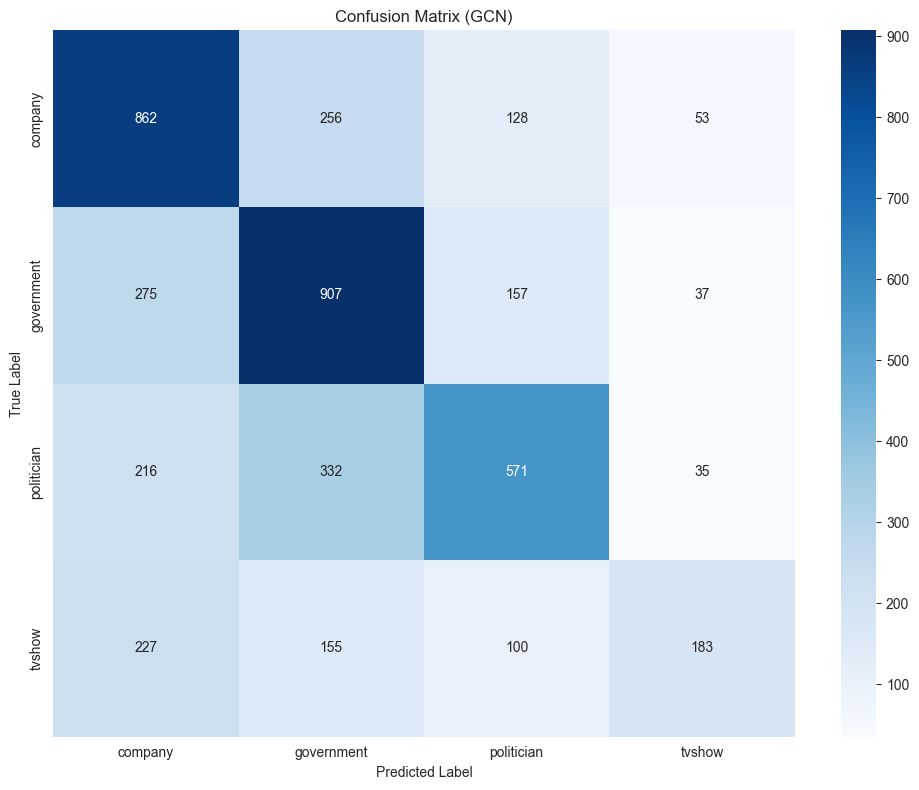

In [127]:
# S'assurer que le modèle est en mode évaluation
model.eval()
out = model(data.x, data.edge_index)

# Prédictions finales
pred = out.argmax(dim=1)

# Vérités et prédictions sur le test set
y_true = data.y[data.test_mask].cpu().numpy()
y_pred = pred[data.test_mask].cpu().numpy()

# 🎯 Rapport de classification
print("\nClassification Report (GCN):")
print(classification_report(
    y_true,
    y_pred,     
    target_names=le.classes_            
))

# 📊 Matrice de confusion
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (GCN)")
plt.tight_layout()
plt.show()

### Baseline word2vec

Comparons cette accuracy de 0.56 à ce qu'on aurait pu obtenir avec une classification via une méthode basique de NLP utilisant word2vec avec le nom de la page Facebook + méthode basique de classification (LogisticRegression)

In [138]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Étape 1 : Préparer les données
# Supposons que tu as déjà :
# target_df = pd.DataFrame(...)

# Tokeniser les page_names
sentences = [name.split(' ') for name in target_df['page_name']]

# Entraîner un Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=2, seed=42, sg=1, epochs=10)

# Fonction pour obtenir l'embedding moyen d'un nom de page
def get_embedding(tokens):
    vecs = [w2v_model.wv[token] for token in tokens if token in w2v_model.wv]
    if len(vecs) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(vecs, axis=0)

# Appliquer à toutes les lignes
X = np.vstack(target_df['page_name'].apply(lambda x: get_embedding(x.split('_'))))
y = target_df['page_type']

# Encodage des classes
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split train / test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Classifieur
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Prédictions
y_pred = clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (Word2Vec + LogisticRegression) : {acc:.4f}")

Test Accuracy (Word2Vec + LogisticRegression) : 0.3255



Classification Report (GCN):
              precision    recall  f1-score   support

     company       0.81      0.08      0.15      1340
  government       0.31      1.00      0.47      1358
  politician       0.00      0.00      0.00      1125
      tvshow       0.00      0.00      0.00       671

    accuracy                           0.33      4494
   macro avg       0.28      0.27      0.16      4494
weighted avg       0.34      0.33      0.19      4494



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

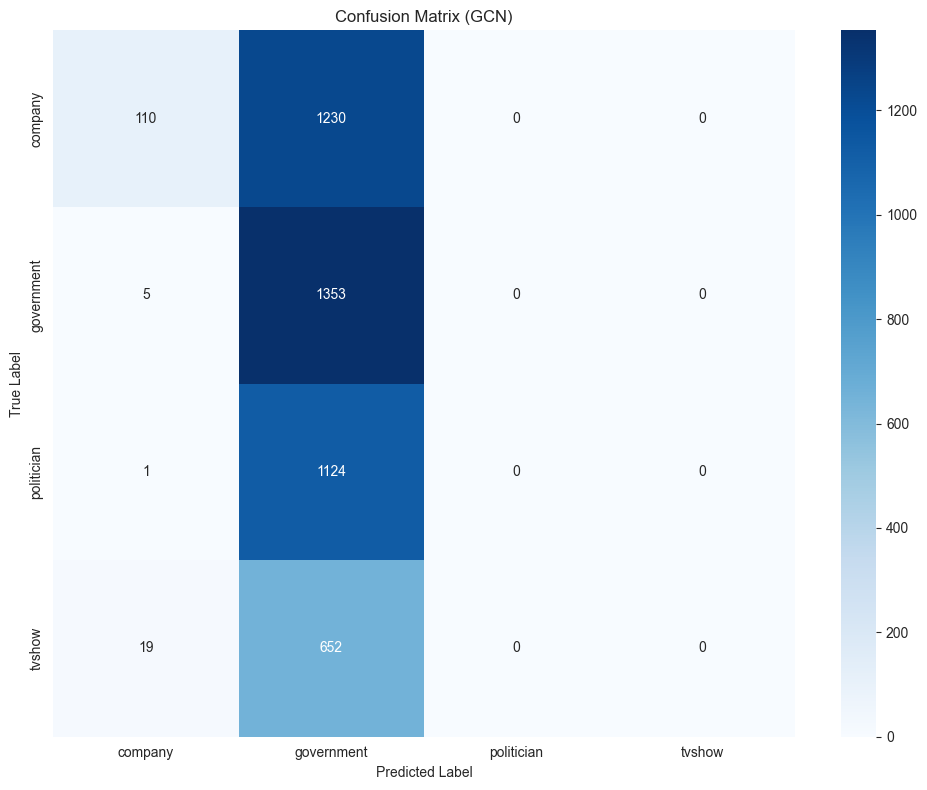

In [145]:
# 🎯 Rapport de classification
print("\nClassification Report (GCN):")
print(classification_report(
    y_test,
    y_pred,     
    target_names=le.classes_            
))

# 📊 Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (GCN)")
plt.tight_layout()
plt.show()

# Github Musae Dataset

## Objectif de la classification

L'objectif de cette tâche est de prédire la spécialisation d'un développeur — **Web** ou **Machine Learning** — à partir de la structure d'un graphe. Pour cela, nous utilisons un **Graph Neural Network (GNN)**, un type de réseau de neurones particulièrement adapté au traitement de données relationnelles sous forme de graphes.

Le dataset fourni se compose de trois fichiers :
- Un fichier **d'arêtes (edges)** représentant la structure du graphe, c’est-à-dire les relations entre les développeurs.
- Un fichier **JSON de features**, contenant des caractéristiques pour chaque nœud (développeur), qu’il faudra prétraiter avant de les intégrer au modèle.
- Un fichier **de labels**, indiquant pour chaque nœud s’il s’agit d’un développeur Web ou Machine Learning.

L'ensemble de ces données sera utilisé pour entraîner notre GNN à effectuer la classification des nœuds.


In [ ]:
import json
import pandas as pd

# Charger le JSON
with open("datasets/github/musae_git_features.json", "r") as f:
    node_features = json.load(f)

# Construction des tuples (node, feature)
rows = []
for node, features in node_features.items():
    for feat in features:
        rows.append((int(node), feat))

# Création du DataFrame binaire
df = pd.DataFrame(rows, columns=["id", "feature"])
binary_df = pd.crosstab(df["id"], df["feature"]).astype(int)

target_df = pd.read_csv("datasets/github/musae_git_target.csv")

# Vérifier les colonnes du fichier cible
print(target_df.head())

# Ajouter la colonne target au DataFrame binaire
df = binary_df.merge(target_df, left_index=True, right_on="id")




# Résultat
df.head()

   id          name  ml_target
0   0        Eiryyy          0
1   1    shawflying          0
2   2   JpMCarrilho          1
3   3     SuhwanCha          0
4   4  sunilangadi2          1


,0,1,2,3,4,5,6,7,8,9,...,3998,3999,4000,4001,4002,4003,4004,id,name,ml_target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Eiryyy,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,shawflying,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,JpMCarrilho,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,SuhwanCha,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,sunilangadi2,1


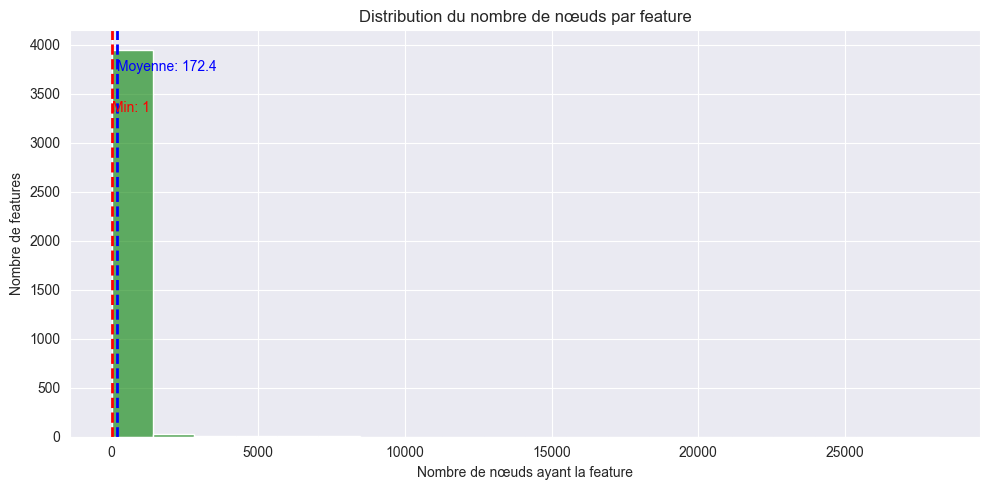

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Somme des 1s par colonne (= combien de nœuds ont cette feature)
feature_sums = binary_df.sum(axis=0).sort_values(ascending=False)

# Calcul des statistiques
mean_val = feature_sums.mean()
min_val = feature_sums.min()

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(feature_sums, bins=20, color='green', alpha=0.6)

# Ligne et texte pour la moyenne
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2)
plt.text(mean_val + 0.5, plt.ylim()[1]*0.9, f'Moyenne: {mean_val:.1f}', color='blue')

# Ligne et texte pour le minimum
plt.axvline(min_val, color='red', linestyle='--', linewidth=2)
plt.text(min_val + 0.5, plt.ylim()[1]*0.8, f'Min: {min_val}', color='red')

# Labels et titre
plt.xlabel("Nombre de nœuds ayant la feature")
plt.ylabel("Nombre de features")
plt.title("Distribution du nombre de nœuds par feature")
plt.tight_layout()
plt.show()

## Analyse des features

Le nombre de features est très important : **plus de 4000**. Cela peut poser des problèmes de sur-apprentissage, car le modèle pourrait apprendre à mémoriser les données d'entraînement plutôt qu'à généraliser sur de nouvelles données.

Une première observation met en évidence une forte disparité dans la distribution des features : plus de **95 % des features n'apparaissent que dans moins de 1 % des nœuds**. Cela suggère que la majorité des features sont très spécifiques et peu représentatives à l’échelle globale du graphe.

Nous faisons donc l'hypothèse qu'un **sous-ensemble réduit de features**, mieux réparties entre les nœuds, pourrait suffire à obtenir de bonnes performances de classification. 

Pour cela, nous allons appliquer une méthode simple de **sélection de features**, fondée uniquement sur le **nombre de nœuds concernés par chaque feature**. L'objectif est de conserver uniquement les features suffisamment générales pour faciliter l'apprentissage et améliorer la capacité de généralisation du modèle. On peut par exemple choisir seulement les features qui apparaissent dans au moins 5 % des nœuds, ou encore les 5% plus fréquentes.


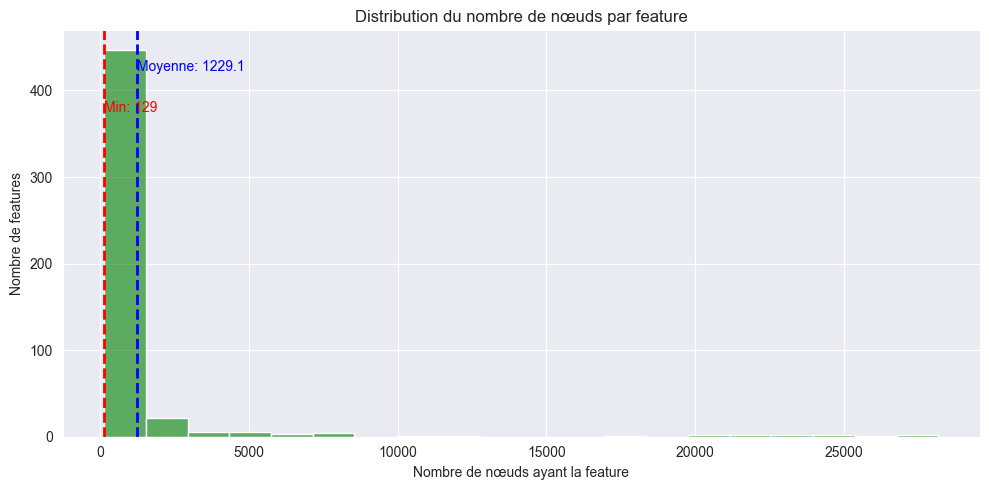

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Somme des 1s par colonne (= combien de nœuds ont cette feature)
feature_sums = binary_df.sum(axis=0).sort_values(ascending=False)[:500]


# Calcul des statistiques
mean_val = feature_sums.mean()
min_val = feature_sums.min()

plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.histplot(feature_sums, bins=20, color='green', alpha=0.6)

# Ligne et texte pour la moyenne
plt.axvline(mean_val, color='blue', linestyle='--', linewidth=2)
plt.text(mean_val + 0.5, plt.ylim()[1]*0.9, f'Moyenne: {mean_val:.1f}', color='blue')

# Ligne et texte pour le minimum
plt.axvline(min_val, color='red', linestyle='--', linewidth=2)
plt.text(min_val + 0.5, plt.ylim()[1]*0.8, f'Min: {min_val}', color='red')

# Labels et titre
plt.xlabel("Nombre de nœuds ayant la feature")
plt.ylabel("Nombre de features")
plt.title("Distribution du nombre de nœuds par feature")
plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch_geometric.data import Data
binary_df = binary_df[binary_df.columns.intersection(feature_sums.index)]

# Suppose que les features sont dans un DataFrame pandas
x = torch.tensor(binary_df.values, dtype=torch.float)

# Charger les edges (ex: CSV avec colonnes "source", "target")
edge_df = pd.read_csv('datasets/github/musae_git_edges.csv')  # ou autre format

# Tensor des arêtes
edge_index = torch.tensor(edge_df.values.T, dtype=torch.long)

# Créer l'objet Data
data = Data(x=x, edge_index=edge_index)

data.y = torch.tensor(df['ml_target'].values, dtype=torch.long)

In [ ]:
import torch.nn.functional as F

class GCN(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, two_hops = True):
        super().__init__()
        self.two_hops = two_hops
        if not self.two_hops:
            hidden_channels = out_channels
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        if self.two_hops:
            x = F.relu(x)
            x = self.conv2(x, edge_index)
        return x.squeeze()

def node_dropping(x, drop_prob=0.1):
    """
    Fonction qui supprime aléatoirement des nœuds en les mettant à zéro
    avec une probabilité donnée (drop_prob).
    """
    mask = torch.rand(x.size(0)) > drop_prob  # Crée un masque pour garder certains nœuds
    x = x * mask.unsqueeze(-1)  # Applique le masque sur les caractéristiques des nœuds
    return x

class GCNWithNodeDropping(GCN):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__(in_channels, hidden_channels, out_channels)

    def forward(self, data, drop_prob=0.1):
        x, edge_index = data.x, data.edge_index
        x = node_dropping(x, drop_prob)  # Applique node dropping
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x.squeeze()

On introduit ici des Graph Convolutional Networks (GCN) pour la classification de nœuds. Ces réseaux sont conçus pour traiter des données sous forme de graphes, en tenant compte des relations entre les nœuds. Ils sont particulièrement adaptés à notre tâche de classification, car ils permettent d'extraire des caractéristiques locales et globales du graphe, tout en préservant la structure relationnelle des données.

In [ ]:
import torch
import torch.nn as nn
from torch_geometric.nn import MessagePassing

class MessagePassingNetwork(MessagePassing):
    def __init__(self, in_channels, hidden_channels, out_channels, num_hops=2):
        super(MessagePassingNetwork, self).__init__(aggr='mean')  # 'add' signifie que les messages des voisins seront additionnés
        self.linear1 = nn.Linear(in_channels, hidden_channels)
        self.linear2 = nn.Linear(hidden_channels, out_channels)
        self.num_hops = num_hops

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        # Applique une transformation linéaire avant la propagation
        x = self.linear1(x)
        # Propagation du message
        for i in range(self.num_hops):
            x = self.propagate(edge_index, x=x)
        # Applique une transformation linéaire après la propagation
        x = self.linear2(x)
        return x.squeeze()

    def message(self, x_j):
        # Le message que chaque voisin envoie est simplement les caractéristiques de ce voisin
        return x_j

    def update(self, aggr_out):
        # Update de chaque noeud après la propagation des messages. Ici, on applique une activation ReLU
        return F.relu(aggr_out)

Ici, on implémente un Message Passing Neural Network (MPNN) pour la classification de nœuds. Ce type de réseau est basé sur le principe de propagation des messages entre les nœuds du graphe, permettant ainsi d'extraire des informations locales et globales sur la structure du graphe.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv

class GraphSAGE(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGE, self).__init__()
        
        # Définition des couches GraphSAGE (SAGEConv)
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, out_channels)
    
    def forward(self, data, drop_prob=0.4):
        # Récupérer les informations sur les nœuds et les arêtes
        x, edge_index = data.x, data.edge_index
        x = node_dropping(x, drop_prob)  # Applique node dropping
        # Première couche GraphSAGE
        x = self.conv1(x, edge_index)
        x = F.relu(x)  # Activation ReLU
        
        # Deuxième couche GraphSAGE
        x = self.conv2(x, edge_index)
        return x.squeeze()

Ici, on introduit un nouveau modèle basé sur GraphSAGE, qui est une autre architecture de GNN. GraphSAGE utilise un mécanisme d'échantillonnage puis de convolution pour agréger les caractéristiques des nœuds voisins, ce qui le rend plus efficace pour les grands graphes.

In [ ]:
from torch_geometric.nn import GATConv

class GAT(nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_heads=8):
        super().__init__()
        
        # Première couche GAT avec plusieurs têtes d'attention
        self.conv1 = GATConv(in_channels, hidden_channels, heads=num_heads, concat=True)
        
        # Deuxième couche GAT avec 1 seule tête pour la sortie
        self.conv2 = GATConv(hidden_channels * num_heads, out_channels, heads=1, concat=False)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        
        # Première couche GAT + ReLU
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        
        # Deuxième couche GAT
        x = self.conv2(x, edge_index)
        
        return x.squeeze()

finalement, on introduit un Graph Attention Network (GAT), qui utilise des mécanismes d'attention pour pondérer l'importance des voisins lors de l'agrégation des caractéristiques. Cela permet au modèle de se concentrer sur les nœuds les plus pertinents pour la tâche de classification, tout en tenant compte de la structure du graphe.

In [ ]:
# Masques pour différencier train, val, test
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.train_mask[:int(0.8 * data.num_nodes)] = True

data.val_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.val_mask[int(0.8 * data.num_nodes):int(0.9 * data.num_nodes)] = True

data.test_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask[int(0.9 * data.num_nodes):] = True

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
# Calcule les proportions
y_train = data.y[data.train_mask]
n_pos = y_train.sum().item()
n_neg = y_train.shape[0] - n_pos
pos_weight = torch.tensor([n_neg / n_pos])

# Ajoute le poids dans la loss
loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#model = GCN(in_channels=x.shape[1], hidden_channels=64, out_channels=1, two_hops=False).to(device)
#model = GCN(in_channels=x.shape[1], hidden_channels=64, out_channels=1).to(device)
#model = GCNWithNodeDropping(in_channels=x.shape[1], hidden_channels=64, out_channels=1).to(device)
#model = GraphSAGE(in_channels=x.shape[1], hidden_channels=64, out_channels=1).to(device)
model = MessagePassingNetwork(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_hops = 2).to(device)
#model = GAT(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_heads=8).to(device)
data = data.to(device)

# Suppose que tu utilises BCEWithLogitsLoss et que le modèle sort [N]
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

for epoch in range(1, 101):
    model.train()
    optimizer.zero_grad()
    out = model(data)  # shape: [num_nodes]

    # Train loss
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask].float())
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        val_logits = out[data.val_mask]
        val_labels = data.y[data.val_mask].float()

        val_probs = torch.sigmoid(val_logits)
        val_preds = (val_probs > 0.5).long()

        val_loss = loss_fn(val_logits, val_labels)
        val_acc = accuracy_score(val_labels.cpu(), val_preds.cpu())

        # Calcul du F1-score pour la classe 1
        val_f1 = f1_score(val_labels.cpu(), val_preds.cpu(), pos_label=1)

    if epoch % 10 == 0 or epoch == 1:
        print(f"[Epoch {epoch:03d}] Train Loss: {loss:.4f} | Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1 (Class 1): {val_f1:.4f}")

[Epoch 001] Train Loss: 1.0308 | Val Loss: 1.0286 | Val Acc: 0.2955 | Val F1 (Class 1): 0.3880
[Epoch 010] Train Loss: 0.8597 | Val Loss: 0.8016 | Val Acc: 0.7785 | Val F1 (Class 1): 0.6114
[Epoch 020] Train Loss: 0.7970 | Val Loss: 0.7175 | Val Acc: 0.7753 | Val F1 (Class 1): 0.6224
[Epoch 030] Train Loss: 0.7890 | Val Loss: 0.7122 | Val Acc: 0.7769 | Val F1 (Class 1): 0.6264
[Epoch 040] Train Loss: 0.7864 | Val Loss: 0.7124 | Val Acc: 0.7753 | Val F1 (Class 1): 0.6251
[Epoch 050] Train Loss: 0.7827 | Val Loss: 0.7121 | Val Acc: 0.7844 | Val F1 (Class 1): 0.6303
[Epoch 060] Train Loss: 0.7805 | Val Loss: 0.7129 | Val Acc: 0.7862 | Val F1 (Class 1): 0.6316
[Epoch 070] Train Loss: 0.7779 | Val Loss: 0.7075 | Val Acc: 0.7748 | Val F1 (Class 1): 0.6281
[Epoch 080] Train Loss: 0.7762 | Val Loss: 0.7066 | Val Acc: 0.7732 | Val F1 (Class 1): 0.6287
[Epoch 090] Train Loss: 0.7747 | Val Loss: 0.7136 | Val Acc: 0.7878 | Val F1 (Class 1): 0.6327
[Epoch 100] Train Loss: 0.7716 | Val Loss: 0.7101 

In [ ]:
from sklearn.metrics import classification_report
import torch

model.eval()
with torch.no_grad():
    out = model(data)
    
    # Pour classification binaire : appliquer sigmoid puis seuil 0.5
    probs = torch.sigmoid(out).squeeze()  # shape: [num_nodes]
    preds = (probs > 0.5).long()
    
    y_true = data.y[data.test_mask].cpu().numpy()
    y_pred = preds[data.test_mask].cpu().numpy()

    acc = (y_pred == y_true).mean()
    print(f"Test Accuracy: {acc:.4f}")

    # Rapport de classification
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))


Test Accuracy: 0.7751

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.84      2773
           1       0.55      0.77      0.64       997

    accuracy                           0.78      3770
   macro avg       0.73      0.77      0.74      3770
weighted avg       0.81      0.78      0.78      3770



In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Liste des modèles à tester
models = [
    ('MessagePassingOneHops', MessagePassingNetwork(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_hops=1)),
    ('MessagePassingTwoHops', MessagePassingNetwork(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_hops=2)),
    ('MessagePassingThreeHops', MessagePassingNetwork(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_hops=3)),
    ('GCN', GCN(in_channels=x.shape[1], hidden_channels=64, out_channels=1, two_hops=False)),
    ('GraphSAGE', GraphSAGE(in_channels=x.shape[1], hidden_channels=64, out_channels=1)),
    ('GAT', GAT(in_channels=x.shape[1], hidden_channels=64, out_channels=1, num_heads=8)),
    ('GCNWithNodeDropping', GCNWithNodeDropping(in_channels=x.shape[1], hidden_channels=64, out_channels=1)),
    ('GCNTwoHops', GCN(in_channels=x.shape[1], hidden_channels=64, out_channels=1, two_hops=True))
    
    
]

# Pour stocker les résultats
results = []

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Entraînement et évaluation de chaque modèle
for model_name, model in models:
    print(f"Training {model_name}...")
    model = model.to(device)
    data = data.to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
    loss_fn = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    
    # Training loop
    for epoch in range(1, 51):
        model.train()
        optimizer.zero_grad()
        out = model(data)  # shape: [num_nodes]
        loss = loss_fn(out[data.train_mask | data.val_mask], data.y[data.train_mask | data.val_mask].float())
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0 or epoch == 1:
            print(f"[Epoch {epoch:03d}] Train Loss: {loss:.4f}")

    # Évaluation sur l'ensemble de test
    print(f"Evaluating {model_name}...")
    model.eval()
    with torch.no_grad():
        test_logits = out[data.test_mask]
        test_labels = data.y[data.test_mask].float()

        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()

        test_loss = loss_fn(test_logits, test_labels)
        test_acc = accuracy_score(test_labels.cpu(), test_preds.cpu())
        test_precision = precision_score(test_labels.cpu(), test_preds.cpu())
        test_recall = recall_score(test_labels.cpu(), test_preds.cpu())
        test_f1 = f1_score(test_labels.cpu(), test_preds.cpu())
        test_auc = roc_auc_score(test_labels.cpu(), test_probs.cpu())

        # Stocker les résultats pour ce modèle
        results.append({
            'Model': model_name,
            'Test Loss': test_loss.item(),
            'Test Accuracy': test_acc,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1': test_f1,
            'Test AUC-ROC': test_auc
        })

# Créer un DataFrame avec les résultats
df_results = pd.DataFrame(results)

# Afficher les résultats
print(df_results)


Training MessagePassingOneHops...
[Epoch 001] Train Loss: 1.0278
[Epoch 010] Train Loss: 0.7779
[Epoch 020] Train Loss: 0.7493
[Epoch 030] Train Loss: 0.7391
[Epoch 040] Train Loss: 0.7312
[Epoch 050] Train Loss: 0.7242
Evaluating MessagePassingOneHops...
Training MessagePassingTwoHops...
[Epoch 001] Train Loss: 1.0293
[Epoch 010] Train Loss: 0.8483
[Epoch 020] Train Loss: 0.7863
[Epoch 030] Train Loss: 0.7783
[Epoch 040] Train Loss: 0.7758
[Epoch 050] Train Loss: 0.7727
Evaluating MessagePassingTwoHops...
Training MessagePassingThreeHops...
[Epoch 001] Train Loss: 1.0289
[Epoch 010] Train Loss: 0.8989
[Epoch 020] Train Loss: 0.8242
[Epoch 030] Train Loss: 0.8174
[Epoch 040] Train Loss: 0.8160
[Epoch 050] Train Loss: 0.8145
Evaluating MessagePassingThreeHops...
Training GCN...
[Epoch 001] Train Loss: 1.0053
[Epoch 010] Train Loss: 0.8654
[Epoch 020] Train Loss: 0.7766
[Epoch 030] Train Loss: 0.7255
[Epoch 040] Train Loss: 0.6948
[Epoch 050] Train Loss: 0.6757
Evaluating GCN...
Training

In [ ]:
df_results

,Model,Test Loss,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC-ROC
0,MessagePassingOneHops,0.706470,0.795491,0.594010,0.716148,0.649386,0.858595
1,MessagePassingTwoHops,0.704688,0.778780,0.560957,0.752257,0.642674,0.856558
2,MessagePassingThreeHops,0.748914,0.772944,0.556627,0.695085,0.618198,0.837888
3,GCN,0.703284,0.842440,0.687442,0.741224,0.713320,0.882949
4,GraphSAGE,0.655064,0.827321,0.652557,0.742227,0.694510,0.883610
5,GAT,0.612064,0.845889,0.687050,0.766299,0.724514,0.898214
6,GCNWithNodeDropping,0.655819,0.835809,0.670270,0.746239,0.706217,0.887821
7,GCNTwoHops,0.643853,0.846154,0.694315,0.747242,0.719807,0.892533


## Évaluation des performances

Étant donné la nature **binaire et déséquilibrée** de notre tâche de classification, les métriques les plus pertinentes sont le **F1-score** et l’**AUC-ROC**.

Parmi les modèles testés, c’est notre **GAT (Graph Attention Network)** qui obtient les **meilleurs résultats**. Cela suggère que le mécanisme d'attention est particulièrement adapté à cette tâche, en mettant en évidence que certains nœuds ont une **importance plus grande que d'autres** dans le processus de classification.

En seconde position, on retrouve notre **GCN (Graph Convolutional Network)** avec **2 hops**, suivi de près par le GCN avec **1 hop**. Ces résultats montrent que la profondeur du modèle a un impact, mais qu’il est possible d’obtenir de bonnes performances avec une architecture relativement simple.

Enfin, les autres méthodes testées obtiennent des résultats **en dessous des attentes**. Une recherche plus poussée des **hyperparamètres** (nombre de couches, taux d'apprentissage, régularisation, etc.) pourrait permettre d’améliorer les performances globales et potentiellement **modifier l'ordre des meilleurs modèles**.
